In [1]:
from scipy.stats import binom, norm, ttest_ind, ttest_1samp, ttest_rel
from scipy import integrate
import numpy as np

In [2]:
rv = binom(10, 1/2)
rv.pmf(10) + rv.pmf(9)

0.01074218750000001

In [3]:
rv = binom(10, 3/4)
1 - round(rv.pmf(0) + rv.pmf(1) + rv.pmf(2) + rv.pmf(3) + rv.pmf(4) + rv.pmf(5) + rv.pmf(6) + rv.pmf(7) + rv.pmf(8), 2)
# round(rv.pmf(10) + rv.pmf(9), 2)

0.24

In [4]:
rv.pmf(0) + rv.pmf(1) + rv.pmf(2)

0.0004158020019531252

In [5]:
1 - ((1 - 0.00048828124999999995)**50) <= 0.05

True

In [6]:
0.96*2

1.92

In [7]:
nd = norm(175, 8**2)

In [8]:
1 - nd.cdf(180)

0.4688643104217245

In [9]:
(180-175)/8

0.625

In [10]:
nd.ppf(0.625)

195.39291929372

In [11]:
1 - nd.cdf(nd.ppf(0.625))

0.375

In [12]:
import numpy as np

sample_1 = [2, 4, 6, 1, 3, 1, 4]
sample_2 = [3, 6, 2, 5, 7, 7]

sample_1_len = len(sample_1)
sample_2_len = len(sample_2)

t_stat = (
        np.mean(sample_1) - np.mean(sample_2)
    )/np.sqrt(
            np.std(sample_1) + np.std(sample_2)
    )

In [13]:
round(t_stat, 2)

-1.05

In [14]:
print(round(ttest_ind(
    [300, 320, 200, 700],
    [350, 370, 240, 750],
).pvalue, 3))

0.772


In [15]:
rv = norm(175, 8)
1 - rv.cdf(180)

0.26598552904870054

In [16]:
rv = norm(0, np.sqrt(5/100))
round(rv.ppf(0.95), 2)

0.37

In [17]:
rv = norm(0.5, np.sqrt(5/100))
1 - round(rv.cdf(0.37), 2)

0.72

In [18]:
rv = norm(1, np.sqrt(5/100))
1 - round(rv.cdf(0.37), 3)

0.998

In [19]:
round(ttest_1samp([50, 50, 40, 50], 0).pvalue, 4)

0.0003

In [20]:
ttest_rel(
    [300, 320, 200, 700],
    [350, 370, 240, 750],
)

Ttest_relResult(statistic=-19.0, pvalue=0.00031834344007115753)

In [21]:
arr = [300, 320, 200, 700]
arr[0], arr[1] = arr[1], arr[0]
arr

[320, 300, 200, 700]

In [22]:
from scipy.stats import ttest_ind

control_group = [6, 7, 7, 5, 7, 8, 8, 7, 7, 7]
treatment_group = [7, 6, 6, 5, 5, 6, 7, 5, 5, 8]

# two-side alternative
ttest_result = ttest_ind(treatment_group, control_group)
print(ttest_result)

# one-side alternative
p_value = ttest_result.pvalue/2
print('p_value =', p_value)

Ttest_indResult(statistic=-2.076923076923078, pvalue=0.05240200640713197)
p_value = 0.026201003203565984


In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
def test_consist(population, estimator, stat, min_size=10, max_size=100000, size_step=100):
    estimates = []
    sample_sizes = range(min_size, max_size, size_step)
    
    pop_stat = stat(population)
    
    for sample_size in sample_sizes:
        sample = np.random.choice(population, size=sample_size)
        estimate = estimator(sample)
        estimates.append(estimate)
        
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    ax1.plot(sample_sizes, estimates, '.', label='estimate')
    ax1.plot(sample_sizes, np.ones_like(sample_sizes)*pop_stat)
    
    ax2.plot(sample_sizes, np.abs(np.array(estimates) - pop_stat), '.')
    ax2.plot(sample_sizes, np.zeros_like(sample_sizes))
    

In [25]:
population_symmetric = [-3, -2, -1, 0, 1, 2, 3]
print(np.median(population_symmetric))

0.0


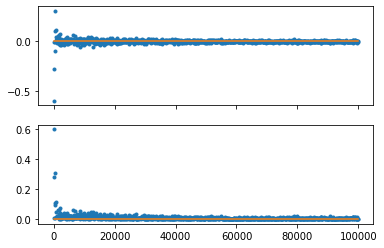

In [26]:
test_consist(
    population_symmetric,
    np.mean,
    np.median
)

In [40]:
def mean_of_half(sample):
    return np.mean(sample[:len(sample)//2])

In [43]:
population_arbitrary = [1, 4, 6, 8, 45, 6, 3, 7, 9, 10, 5, 34, 11, 3, 23, 78, 18, 38, 4, 0]
print(mean_of_half(population_arbitrary))
print(np.mean(population_arbitrary))

9.9
15.65


In [48]:
def mean_of_10(sample):
    return np.mean(sample[:10])

In [50]:
population_arbitrary = [1, 4, 6, 8, 45, 6, 3, 7, 9, 10, 5, 34, 11, 3, 23, 78, 18, 38, 4, 0]
print(mean_of_10(population_arbitrary))
print(np.mean(population_arbitrary))

9.9
15.65


In [53]:
def mean_with_coeff(sample):
    return np.mean(sample) + 1/len(sample)

population_arbitrary = [1, 4, 6, 8, 45, 6, 3, 7, 9, 10, 5, 34, 11, 3, 23, 78, 18, 38, 4, 0]
print(mean_with_coeff(population_arbitrary))
print(np.mean(population_arbitrary))

15.700000000000001
15.65


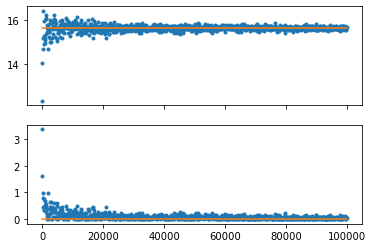

In [55]:
test_consist(
    population_arbitrary,
    mean_with_coeff,
    np.mean
)

In [23]:
def find_bias(population, estimator, stat, sample_size, iterations=100000):
    estimates = []
    
    pop_stat = stat(population)
    
    for i in range(iterations):
        sample = np.random.choice(population, size=sample_size)
        estimate = estimator(sample)
        estimates.append(estimate)
    
    return np.abs(np.mean(estimates) - pop_stat)

In [24]:
def first_el(sample):
    return sample[0]

In [39]:
find_bias(population_symmetric, np.mean, np.median, 5)

0.003738

In [32]:
population_arbitrary = [1, 4, 6, 8, 45, 6, 3, 7, 9, 10, 5, 34, 11, 3, 23, 78, 18, 38, 4, 0]
print(np.median(population_arbitrary))

7.5


In [38]:
find_bias(population_arbitrary, first_el, np.median, 18)

8.09963

In [60]:
find_bias(
    population_arbitrary,
    mean_of_half,
    np.mean,
    3
)

0.044629999999999725

In [61]:
find_bias(
    population_arbitrary,
    mean_of_10,
    np.mean,
    3
)

0.0038633333333315534

In [62]:
find_bias(
    population_arbitrary,
    mean_with_coeff,
    np.mean,
    3
)

0.32035333333333504

In [63]:
find_bias(
    population_arbitrary,
    np.mean,
    np.mean,
    3
)

0.02508333333333468

In [71]:
a = 10

sample = np.random.uniform(0, 1, 100)
pdf = lambda x: (2/a**2)*(a-x)

pdf(5)

def generate_sample(sample_size):
    sample = []
    for i in sample_size:
        x = np.random.uniform(0, a, 100)
        pdf = lambda x: (2/a**2)*(a-x)
        sample.append(pdf(x))

    return sample
print(pdf)

<function <lambda> at 0x7fafe0be6820>


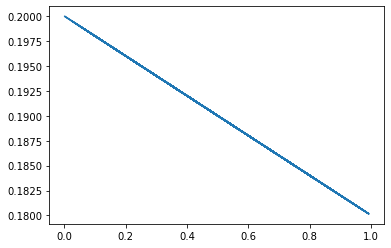

In [72]:
plt.plot(sample, [pdf(x) for x in sample])

In [1]:
from scipy.stats import norm, t
import numpy as np

In [2]:
sample = [1,2,2,4,3,2,5]
sample_mean = np.mean(sample)
stderr = np.std(sample, ddof=1)/np.sqrt(len(sample))
_, coeff = norm.interval(0.99)

round(sample_mean + coeff*stderr, 3)

4.058

In [3]:
sample = [1,2,2,4,3,2,5]
df = len(sample) - 1
sample_mean = np.mean(sample)
stderr = np.std(sample, ddof=1)/np.sqrt(len(sample))
_, coeff = t.interval(0.99, df)

round(sample_mean + coeff*stderr, 3)

4.648

In [8]:
coeff_l, coeff_r = norm.interval(0.95)

In [10]:
norm.cdf(coeff_l)

0.025

In [11]:
if coeff_l < 0:
    abr = 5

In [12]:
abr

5

In [1]:
from scipy.stats import pearsonr

In [2]:
a = [1, 5]
b = [4, 2]
pearsonr(a, b)

(-1.0, 1.0)